In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# classifier we will use
from sklearn.tree import DecisionTreeClassifier

# model selection bits
from sklearn.model_selection import train_test_split

# evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from pathlib import Path

# Detecting Spam with Decision Trees

In this assignment you will detect spam with decision trees. It's always important to investigate the data that you are using for any project. Since data is our gold mine, it's our oil that powers our models we need to have good quality data. Machine learning follows the "garbage in, garbage out" principle, if we feed in bad data for training, we will get a model that produces bad results.  For these reasons we want to answer the following questions.

## 0.  Learn about the data

1. Where did this data come from?
2. Who made it?
3. How were the features selected?
4. Can you trust it?

Go ahead and scan through the spambase_features.txt file and the spambase.txt file.  These two files provide information about the dataset, how it was curated and where it came from. Then try to answer the above questions.


## 1. Load the data

In [2]:
## we are going to hardcode the column names, because this just makes it a little easier to use pandas.

names = ['word_freq_make:        ',
'word_freq_address:     ',
'word_freq_all:         ',
'word_freq_3d:          ',
'word_freq_our:         ',
'word_freq_over:        ',
'word_freq_remove:      ',
'word_freq_internet:    ',
'word_freq_order:       ',
'word_freq_mail:        ',
'word_freq_receive:     ',
'word_freq_will:        ',
'word_freq_people:      ',
'word_freq_report:      ',
'word_freq_addresses:   ',
'word_freq_free:        ',
'word_freq_business:    ',
'word_freq_email:       ',
'word_freq_you:         ',
'word_freq_credit:      ',
'word_freq_your:        ',
'word_freq_font:        ',
'word_freq_000:         ',
'word_freq_money:       ',
'word_freq_hp:          ',
'word_freq_hpl:         ',
'word_freq_george:      ',
'word_freq_650:         ',
'word_freq_lab:         ',
'word_freq_labs:        ',
'word_freq_telnet:      ',
'word_freq_857:         ',
'word_freq_data:        ',
'word_freq_415:         ',
'word_freq_85:          ',
'word_freq_technology:  ',
'word_freq_1999:        ',
'word_freq_parts:       ',
'word_freq_pm:          ',
'word_freq_direct:      ',
'word_freq_cs:          ',
'word_freq_meeting:     ',
'word_freq_original:    ',
'word_freq_project:     ',
'word_freq_re:          ',
'word_freq_edu:         ',
'word_freq_table:       ',
'word_freq_conference:  ',
'char_freq_;:           ',
'char_freq_(:           ',
'char_freq_[:           ',
'char_freq_!:           ',
'char_freq_$:           ',
'char_freq_#:           ',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total: ',
'label']
          

In [3]:
## Load in the dataset here 
data_location = Path.cwd()/'spambase'/'spambase.csv'
data = pd.read_csv(data_location, names = names)
X = data.drop('label', axis = 1)
y = data.label

## 2. Preprocess the data if needed

1. Are there any empty values?
2. Do you need to transform the data?
3. What is the distribution of the positive and negative classes?
4. Split the data into training and testing sets

Let me give a few hints.  When it comes to scaling the data, we normally just _should_, but in this case we are going to be working with decision trees and I think we learned that they have an interesting property!  

We want to look at the distribution of positive (spam) and negative (ham) classes.  So basically we need to look at the count of the labels.  You can use the function `.value_counts()` on `y`.  Note that the function `value_counts` is specific to the Series class, it doesn't work on Dataframes.  Now it's not just enough to look at the raw numbers, I suggest you calculate statistics like "what percentage of my data is ham? What percentage is spam?  This may help you decide if you should use the `stratify` keyword when splitting your data.


In [4]:
missing_values = data.isnull().sum()
print(missing_values)

word_freq_make:               0
word_freq_address:            0
word_freq_all:                0
word_freq_3d:                 0
word_freq_our:                0
word_freq_over:               0
word_freq_remove:             0
word_freq_internet:           0
word_freq_order:              0
word_freq_mail:               0
word_freq_receive:            0
word_freq_will:               0
word_freq_people:             0
word_freq_report:             0
word_freq_addresses:          0
word_freq_free:               0
word_freq_business:           0
word_freq_email:              0
word_freq_you:                0
word_freq_credit:             0
word_freq_your:               0
word_freq_font:               0
word_freq_000:                0
word_freq_money:              0
word_freq_hp:                 0
word_freq_hpl:                0
word_freq_george:             0
word_freq_650:                0
word_freq_lab:                0
word_freq_labs:               0
word_freq_telnet:             0
word_fre

In [5]:
print(y.value_counts())

label
0    2788
1    1813
Name: count, dtype: int64


In [6]:
## Split your data with 70% for training, this is somewhat random, but this is how I will do it in the 
## solution video so you will have similar results. Feel free to change this value and experiment if you like.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)


## 3. Train a Decision Tree Classifier

1. What metric should we use? The f1-score or accuracy?

Let's start with a default model, we won't specify any settings on the decision tree model for the first training. The following will be a 3-step process
 * training
 * getting predictions
 * evaluating our predictions
 
The question does arise, what should we check our predictions on? The obvious answer is that we should check the predictions on our testing set. That's the set of data that simulates our future unseen data. However in our quest to figure out if we are overfitting or not, it could be very useful to look at the performance of the training set.  Remember when we overfit our polynomials and they touched every point? But then we added data the performance would drop. Similarly if the perfomance of the training data is near perfect, but the testing data is much worse, that _gap_ indicates overfitting. So we will check both training and testing performance.


In [7]:
## Train the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
## get predictions from the model on the training data and the testing data
train_pred = dt.predict(X_train)
test_pred = dt.predict(X_test)

In [9]:
## evaluate the predictions
## Note that the order of the arguments is **very** important for f1-score
f1_train = f1_score(y_train, train_pred)
f1_test = f1_score(y_test, test_pred)

print(f1_train)
print(f1_test)

1.0
0.8809523809523809


## 4. Did we overfit? Either way, let's try out some of the decision tree parameters

Go ahead and try out some different tree parameters. 

* `max_depth`
* `min_samples_split`
* `min_samples_leaf`

All three of these parameters will control the complexity of the tree.  Before you try them out, let's take a quick quiz:

* increasing `max_depth` will : **Increase** or **Decrease** overfitting?
* increasing `min_samples_split` will: **Increase** or **Decrease** overfitting?
* increasing `min_samples_leaf` will: **Increase** or **Decrease** overfitting?

It's very important to know the answer to these questions - because other wise you can't tune the parameters correctly. If you aren't sure go back and check the quiz on this very topic.

Go ahead and try at least 3 values for each parameter. Then if you try 3 values for each combination, you actually would try 9 total parameters. You can see where this is going -- `for` loops! At this point I encourage you to just try whatever method you want, you can ad-hoc try different values or you can get robust with for-loops. Whatever you are inspired to do. The main point is to try out some values and see what you find.  What helps improve our testing performance the best?

In [10]:
for i in range(2, 6):
    for j in range(2, 20):
        dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=j, min_samples_split=j)
        dt.fit(X_train, y_train)
        train_pred = dt.predict(X_train)
        test_pred = dt.predict(X_test)
        f1_train = f1_score(y_train, train_pred)
        f1_test = f1_score(y_test, test_pred)
        print(f"For i = {i} and j = {j}:\n")
        print(f1_train)
        print(f1_test)
        print("--------------\n")

For i = 2 and j = 2:

0.9688637282652649
0.8818011257035648
--------------

For i = 2 and j = 3:

0.9629924393155591
0.8791208791208791
--------------

For i = 2 and j = 4:

0.9515418502202643
0.8905380333951762
--------------

For i = 2 and j = 5:

0.9457855164226355
0.89171974522293
--------------

For i = 2 and j = 6:

0.9392616117506947
0.8842297174111212
--------------

For i = 2 and j = 7:

0.9337083165930092
0.8870523415977961
--------------

For i = 2 and j = 8:

0.9295207410390657
0.8806660499537464
--------------

For i = 2 and j = 9:

0.9219452390682468
0.8755846585594014
--------------

For i = 2 and j = 10:

0.9152542372881356
0.8836329233680227
--------------

For i = 2 and j = 11:

0.914004914004914
0.881578947368421
--------------

For i = 2 and j = 12:

0.9123522217692621
0.8868101028999064
--------------

For i = 2 and j = 13:

0.9096045197740112
0.8843663274745606
--------------

For i = 2 and j = 14:

0.907108239095315
0.8876611418047882
--------------

For i = 2 an

# Ok, now let's do it systematically

Let's do it with some for loops. This will lead us to having more data than we can "look" at, so naturally we will plot it.
I've started the for loop for you, you need to fill in the inner part.

In [11]:
train_results = []
test_results = []
for i in range(2,50):                          # feel free to change these, I just threw out a reasonable option here.
    
    dtc = DecisionTreeClassifier(min_samples_leaf=4, max_depth=i, min_samples_split=20)  #select a parameter to check
    dtc.fit(X_train, y_train)                  # train the model
    test = dtc.predict(X_test)                 # get predictions for both training and test
    train = dtc.predict(X_train)
    f1_train = f1_score(y_train, train)
    f1_test = f1_score(y_test, test)           # evaluate them and append them into the our lists.
    train_results.append(f1_train)
    test_results.append(f1_test)
print(train_results)
print ( " ")
print (test_results)

[0.8030438675022382, 0.8496932515337423, 0.8780896522832007, 0.9029086439983613, 0.9102192800992966, 0.9185905224787363, 0.9191592562651576, 0.923323966278603, 0.9261363636363636, 0.9286002420330779, 0.9315512353179426, 0.9322033898305085, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369, 0.9327426500201369]
 
[0.8099173553719008, 0.841171251109139

## That's a lot of numbers!

What do all those numbers tell us? Well we can pick out the best values using something like `np.max` and then we can relate it to the best parameter with the argument that correlates to that value (so depth 2 gave us .85 score etc).  But I think we'll find more interesting to plot these points.  I've provided the code for you below.

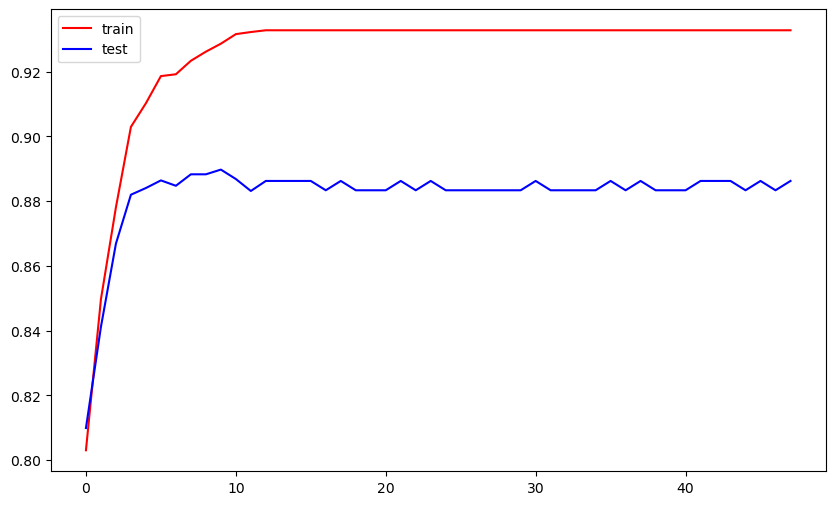

In [12]:
fig,ax = plt.subplots(figsize = (10,6));
ax.plot(train_results, color = 'r', label = 'train')
ax.plot(test_results, color = 'b', label = 'test')
ax.legend()

## This graph is called a validation curve

What we have done is plotted the performance of the training and testing data against a parameter that was varied. How do we read this graph?
What information can you glean?
When does our model start to overfit?  
Based on what you see here, what do you think the best choice for the parameter you were checking is?  That is, looking at the graph, what value would you choose for a spam detection model that you were going to deploy? Don't forget the purpose of the model!


#### Your answers here

# Finally... we ... made a mistake!
Do you see what the giant mistake we did? Go ahead and let us know below.
If you don't see the mistake... don't worry I'll explain in the next unit!


#### Your answer here